In [1]:
# 6.1.4 (Create Latitude and Longitude Combinations) Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-58.71959868371925 -94.19425264263315
-41.26700213045058 43.07526714749628
-48.20188084955323 -2.1149155929697088
34.60464597561952 31.385110402463823
37.14375049258946 -109.50273708932008
-55.361165363474306 126.59360560961153
-63.25971540614577 33.59619130714353
-26.593640658535755 -23.017459946932973
-54.62480716461814 -134.7616548760767
-79.80131524462851 -64.52437575107646
-57.58347157204359 163.9381961621658
-79.69825570600345 94.11808190672758
70.22582964817047 88.27349427266557
10.613216686806325 -129.22678485167427
13.756931305210301 68.00051500398993
83.30969500299784 -36.6126298846244
-23.350075429162843 -66.18313023594456
-51.67180778110379 -65.87380277022088
23.708542241419053 162.91188042660104
16.332484233441008 136.26120594838312
-25.162317462047938 84.1996974761467
84.5500797311798 163.78758930592244
-36.83861894725935 150.69975997191852
-10.18200469180718 -95.89935228620008
39.275521432499346 143.15676175672883
-77.88952767239498 11.327254582666967
-2.6125599719253927

In [5]:
# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [9]:
# 6.2.6 Get the City Weather Data. Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
cities

['punta arenas',
 'tsihombe',
 'cape town',
 'chlorakas',
 'cortez',
 'esperance',
 'port alfred',
 'vila velha',
 'rikitea',
 'ushuaia',
 'bluff',
 'albany',
 'talnakh',
 'atuona',
 'kavaratti',
 'tasiilaq',
 'jujuy',
 'rio gallegos',
 'butaritari',
 'airai',
 'grand river south east',
 'cherskiy',
 'batemans bay',
 'puerto ayora',
 'yamada',
 'hermanus',
 'namanga',
 'mataura',
 'husavik',
 'grand-santi',
 'bengkulu',
 'monrovia',
 'lasa',
 'hamilton',
 'tanza',
 'broome',
 'bjornevatn',
 'mount gambier',
 'iana',
 'at-bashi',
 'ponta do sol',
 'provideniya',
 'tiznit',
 'hobart',
 'kapaa',
 'khatanga',
 'taolanaro',
 'upernavik',
 'acarau',
 'arraial do cabo',
 'georgetown',
 'christchurch',
 'constitucion',
 'cidreira',
 'finote selam',
 'alofi',
 'victoria',
 'horasan',
 'acurenam',
 'busselton',
 'jamestown',
 'shaoyang',
 'dindori',
 'ofunato',
 'oudtshoorn',
 'castro',
 'bukan',
 'hof',
 'pacific grove',
 'khorramshahr',
 'tafresh',
 'east london',
 'uchiza',
 'souillac',
 'vuk

In [11]:
# Cell 10 . Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | chlorakas
Processing Record 5 of Set 1 | cortez
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | jujuy
City not found. Skipping...
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | grand river south east
City not found. S

Processing Record 37 of Set 4 | soe
Processing Record 38 of Set 4 | srandakan
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | hangal
Processing Record 41 of Set 4 | katangli
Processing Record 42 of Set 4 | tezu
Processing Record 43 of Set 4 | elk point
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | birin
Processing Record 46 of Set 4 | nahan
Processing Record 47 of Set 4 | afmadu
City not found. Skipping...
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | eirunepe
Processing Record 50 of Set 4 | kyabe
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | natal
Processing Record 3 of Set 5 | talara
Processing Record 4 of Set 5 | liwale
Processing Record 5 of Set 5 | pascagoula
Processing Record 6 of Set 5 | ho
City not found. Skipping...
Processing Record 7 of Set 5 | ciucurova
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9 of Set 5 | santa cruz
Processing Record 10 of Set 5

Processing Record 25 of Set 8 | maldonado
Processing Record 26 of Set 8 | caravelas
Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | moron
Processing Record 29 of Set 8 | viedma
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | klyuchi
Processing Record 32 of Set 8 | tamiahua
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | merauke
Processing Record 35 of Set 8 | gravelbourg
Processing Record 36 of Set 8 | povenets
Processing Record 37 of Set 8 | belsand
Processing Record 38 of Set 8 | kachug
Processing Record 39 of Set 8 | el alto
Processing Record 40 of Set 8 | pilar
Processing Record 41 of Set 8 | ko samui
Processing Record 42 of Set 8 | whitehorse
Processing Record 43 of Set 8 | nuuk
Processing Record 44 of Set 8 | gusau
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | bagotville
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | chokurdakh
Processing Record 49 of Set 

Processing Record 13 of Set 12 | lisala
Processing Record 14 of Set 12 | atikokan
Processing Record 15 of Set 12 | belz
Processing Record 16 of Set 12 | tual
Processing Record 17 of Set 12 | cap malheureux
Processing Record 18 of Set 12 | alyangula
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | dickson
Processing Record 21 of Set 12 | manggar
Processing Record 22 of Set 12 | usinsk
Processing Record 23 of Set 12 | bundaberg
Processing Record 24 of Set 12 | mumford
Processing Record 25 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 26 of Set 12 | bonthe
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | ampanihy
Processing Record 30 of Set 12 | weymouth
Processing Record 31 of Set 12 | byron bay
Processing Record 32 of Set 12 | tidore
City not found. Skipping...
Processing Record 33 of Set 12 | barranca
Processing Record 34 of Set 12 | okha
Processing Record 35 of Set 12 | 

In [12]:
city_data

[{'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 48.31,
  'Humidity': 61,
  'Cloudiness': 100,
  'Wind Speed': 9.22,
  'Country': 'CL',
  'Date': '2022-10-26 02:21:14'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 61.92,
  'Humidity': 76,
  'Cloudiness': 0,
  'Wind Speed': 11.01,
  'Country': 'ZA',
  'Date': '2022-10-26 02:21:57'},
 {'City': 'Chlorakas',
  'Lat': 34.8042,
  'Lng': 32.4083,
  'Max Temp': 67.08,
  'Humidity': 49,
  'Cloudiness': 0,
  'Wind Speed': 8.05,
  'Country': 'CY',
  'Date': '2022-10-26 02:23:37'},
 {'City': 'Cortez',
  'Lat': 37.3489,
  'Lng': -108.5859,
  'Max Temp': 42.69,
  'Humidity': 59,
  'Cloudiness': 0,
  'Wind Speed': 0,
  'Country': 'US',
  'Date': '2022-10-26 02:23:38'},
 {'City': 'Esperance',
  'Lat': -33.8667,
  'Lng': 121.9,
  'Max Temp': 62.46,
  'Humidity': 67,
  'Cloudiness': 28,
  'Wind Speed': 10.76,
  'Country': 'AU',
  'Date': '2022-10-26 02:23:38'},
 {'City': 'Port Alfred',
  'Lat': -3

In [13]:
    # Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,61,100,9.22,CL,2022-10-26 02:21:14
1,Cape Town,-33.9258,18.4232,61.92,76,0,11.01,ZA,2022-10-26 02:21:57
2,Chlorakas,34.8042,32.4083,67.08,49,0,8.05,CY,2022-10-26 02:23:37
3,Cortez,37.3489,-108.5859,42.69,59,0,0.00,US,2022-10-26 02:23:38
4,Esperance,-33.8667,121.9000,62.46,67,28,10.76,AU,2022-10-26 02:23:38


## blah

In [14]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-10-26 02:21:14,-53.1500,-70.9167,48.31,61,100,9.22
1,Cape Town,ZA,2022-10-26 02:21:57,-33.9258,18.4232,61.92,76,0,11.01
2,Chlorakas,CY,2022-10-26 02:23:37,34.8042,32.4083,67.08,49,0,8.05
3,Cortez,US,2022-10-26 02:23:38,37.3489,-108.5859,42.69,59,0,0.00
4,Esperance,AU,2022-10-26 02:23:38,-33.8667,121.9000,62.46,67,28,10.76


In [16]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

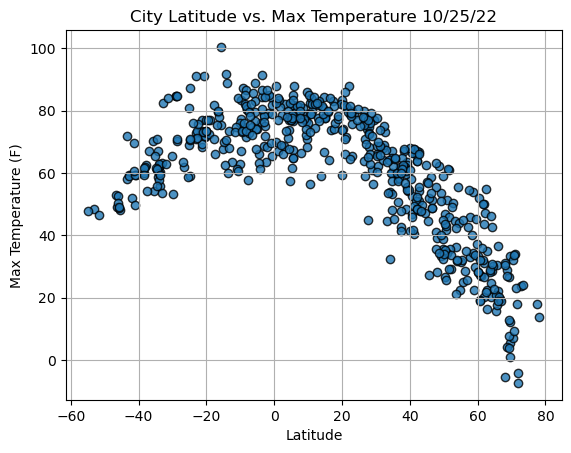

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

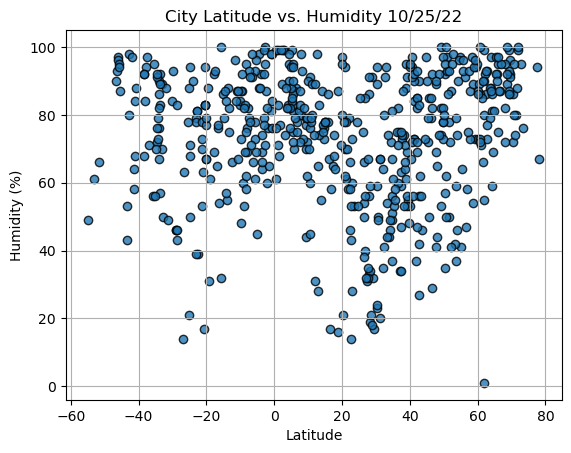

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

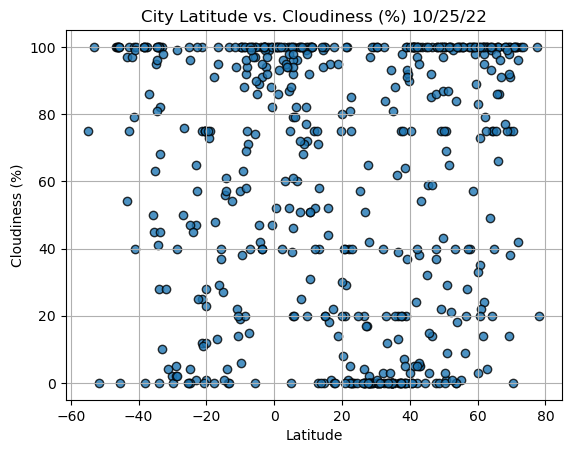

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

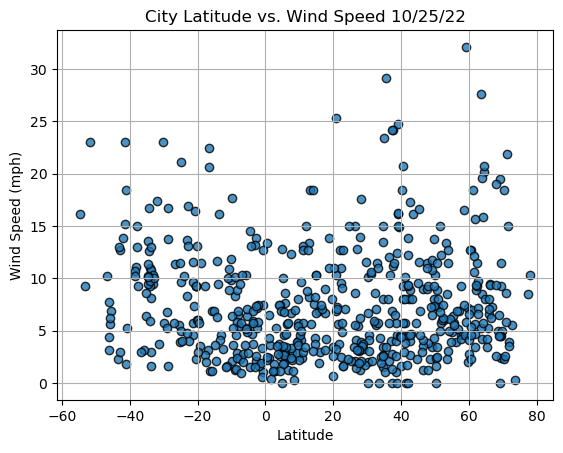

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
#Create the Hemisphere DataFrames
#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.

index13 = city_data_df.loc[13]
index13

City                    Kavaratti
Country                        IN
Date          2022-10-26 02:23:42
Lat                       10.5669
Lng                        72.642
Max Temp                    82.33
Humidity                       60
Cloudiness                     31
Wind Speed                   9.69
Name: 13, dtype: object

In [30]:
#Filter a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
553     True
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [32]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Chlorakas,CY,2022-10-26 02:23:37,34.8042,32.4083,67.08,49,0,8.05
3,Cortez,US,2022-10-26 02:23:38,37.3489,-108.5859,42.69,59,0,0.00
10,Albany,US,2022-10-26 02:23:41,42.6001,-73.9662,66.61,90,38,4.00
11,Talnakh,RU,2022-10-26 02:23:41,69.4865,88.3972,5.36,96,91,2.37
13,Kavaratti,IN,2022-10-26 02:23:42,10.5669,72.6420,82.33,60,31,9.69


In [33]:
#Assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

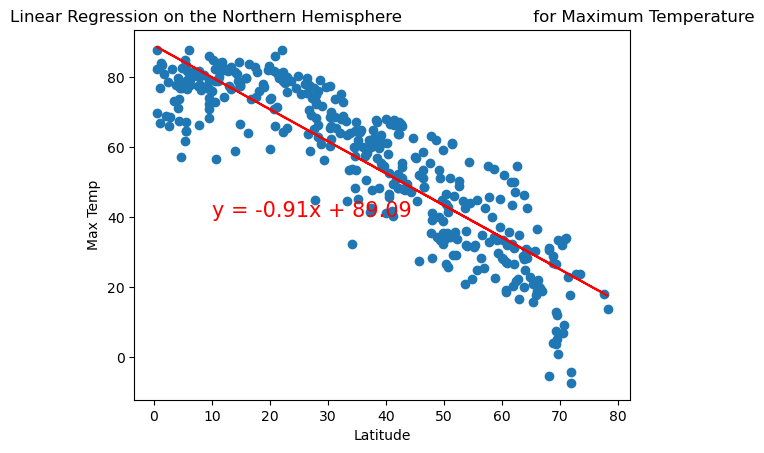

In [34]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

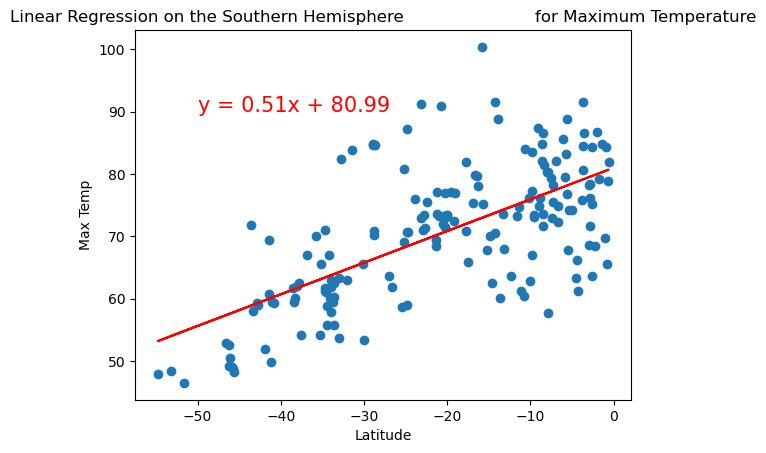

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

**6.4.3 Find the Correlation Between Latitude and Percent Humidity**

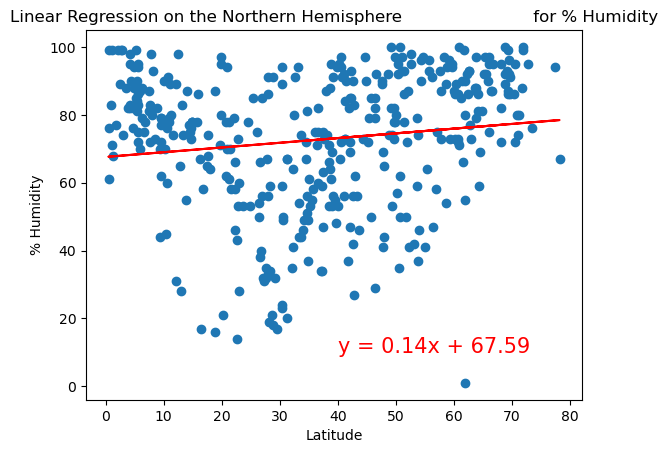

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

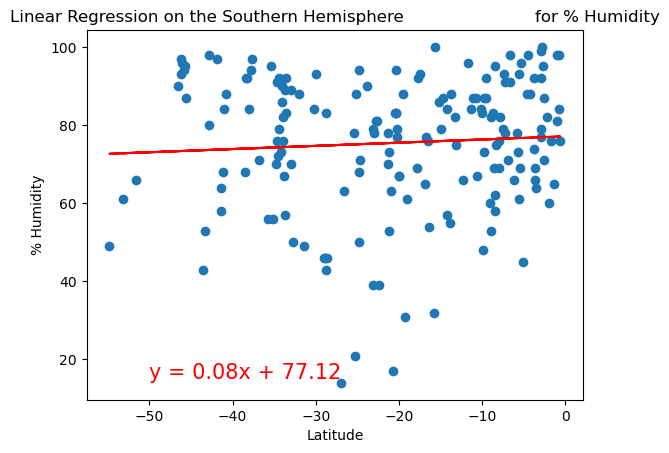

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

**6.4.4 Find the Correlation Between Latitude and Percent Cloudiness**

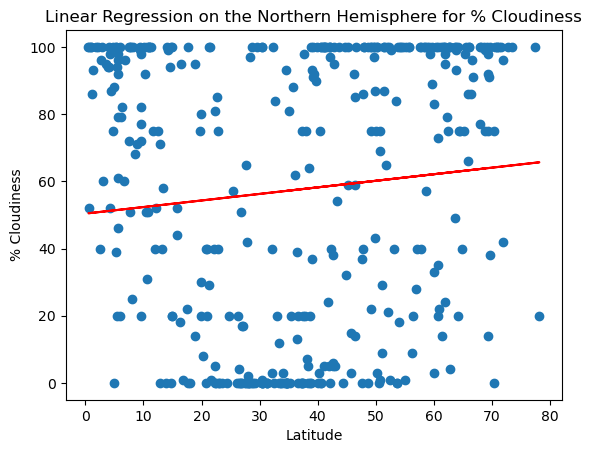

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

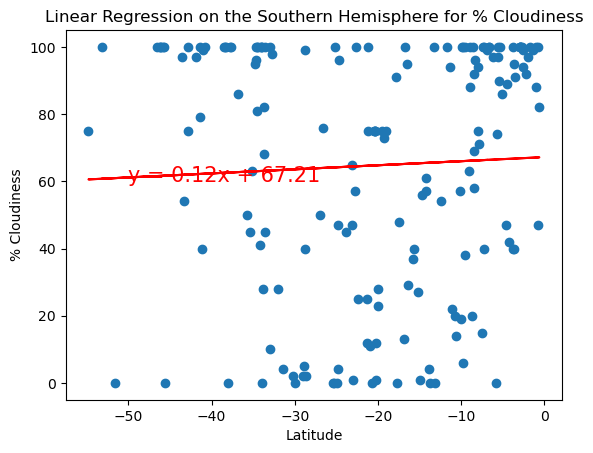

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

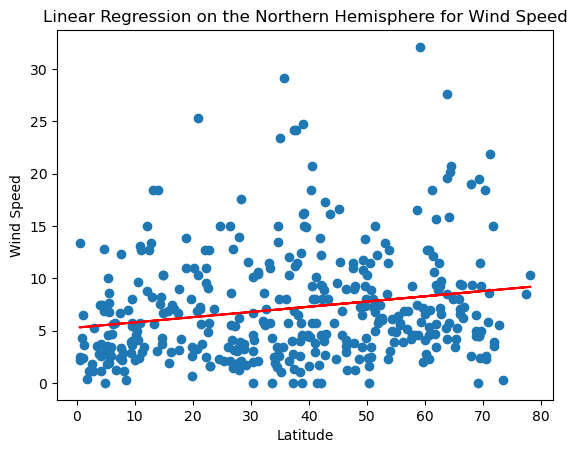

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

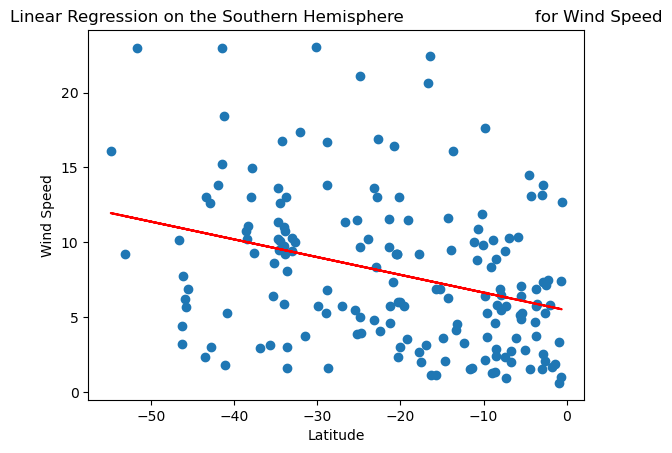

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))